# SENTIMENT ANALYSIS

# Sentiment analysis related to the Students of MNSUA-Multan.
Dataset Information:
                    We are creating a google form, contain blow question. And separate link with students. After all Dataset consisted on 80 instances.

Google form contains on following questions.

1.	Do Your Tutor take your class regularly?
2.	Does the lecture audible to you and you could easily understand it?
3.	Does your tutor know that you have basic concept about topic deliver by him/her?
4.	Does your tutor deliver basics concepts about topic?
5.	Do your tutor change topic direction while explaining specific topic during lecture? if yes explain it.
6.	Did your tutor discourage you to ask questions during class? Explain when?
7.	Do you think that tutor's language or pronunciation is a hurdle in understanding lecture?
8.	What are the factors that influence your learning in the class? e.g. bad quality projector?
9.	How did your tutor support your learning by using technology?
10.	Is tutor engage students into the lecture?
11.	Any Suggestions regarding data collection?


# Requirements
There are some general library requirements for the project and some which are specific to individual methods. The general requirements are as follows.
1.	numpy
2.	wordcloud
3.	vaderSentiment
4.	nltk
5.  pandas
6.  matplotlib
7.  textblob

The library requirements specific to some methods are:
sklearn for SVC, Naive bayes (BernoulliNB)


# Usage
Preprocessing:
Run Students_reviews.py <raw-csv-path> on both train and test data. This will generate a preprocessed version of the dataset.


In [1]:
import re
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import matplotlib.pyplot as plt
from textblob import TextBlob
import time

# Objective
         - Investigate the Student reviews about teachers

# Pseudocode
Dataset labeling:-
Three method are use to label data. Following are they.
1.	textblob
2.	vaderSentiment
3.	manual (expert1,expert2,expert3)

# textblob
Textblob return b/w -1,,,1 values by passing text argument, these result divide into five categories 

1.	High positive (greater than 0.5)
2.	Positive (greater than zero and less than equale to 0.5)
3.   Neutral (equal to zero)
4.	Negative (less than 0 and greater than -0.5)
5.	High negative (less than -0.5)

# VaderSentiment
it return four categories.

1.	Positive 
2.   Neutral
3.	Negative
4.	Compound

# Manual
Label data three expert manualy one by one and fourth is consisted on mujority rule. three categories 
1.	Positive 
2.   Neutral
3.	Negative

In [2]:
data=pd.read_csv("C:\\Users\\touQer_abaS\\Downloads\\Untitled form (1).csv")
data=data.drop(columns=['Timestamp','Expert  1','Exprt 2','Expert 1',"Expert 2","Expert 3","Expert 1.1","Expert2","Expert 3.1",'Expert 3.9','Expert 3.8','Expert 3.7','Expert 3.6','Expert 3.5','Expert 3.4','Expert 3.3','Expert 3.2','Expert 2.7','Expert 2.6','Expert 2.5','Expert 2.4','Expert 2.3','Expert 2.2','Expert 2.1','Expert 1.8','Expert 1.7','Expert 1.6','Expert 1.5','Expert 1.4','Expert 1.3','Expert 1.2','MajorityRule','MajorityRule.1','MajorityRule.2','MajorityRule.3','MajorityRule.4','MajorityRule.5','MajorityRule.6','MajorityRule.7','MajorityRule.8','MajorityRule.9',])
data=data.drop(columns=["Any Suggestions regarding data collection?"])
data.head()

,Do Your Tutor take your class regularly?,Do the lecture audible to you and you could easily understand it?,Do your tutor know that you have basic concept about topic deliver by him/her?,Do your tutor deliver basics concepts about topic?,Do your tutor not change topic direction while explaining specific topic during lecture? if yes explain it.,Do your tutor not discourage you to ask questions during class? If do explain when?,Do you think that tutor's language or pronounciation is not hurdle in understanding lecture?,What are the factors that influence your learning in the class? e.g. bad quality projector?,How did your tutor support your learning by using technology?,Is tutor engage students into the lecture?
0,Yes she take the class on scheduled and very p...,Yes lec is clearly audible and i can easily un...,Sure she knows about assessment,Yes she delivers most of basic concepts,Some time if she feels to explain more she do ...,No i dont think,Sometimes its matters,No this is not true,Yes i depends,Yes she engages by try itself
1,yes she takes classes regularly.,"complete audible , easily understandable",yes by doing brainstorming,yes deliver the basic concept before starting,no,yes due to discourse or fear of insert many st...,yes its not a hurdle if diversify if students,yes,yes sometimes,yes tutor engage them
2,Yes,Yes it is audible and understand it easily.,Tutor know that we have know how about the topic,Yes mostly tutor deliver basic concepts about...,No tutor change the tipic direction while expl...,I think this is the basic hurdle when teacher ...,No this is a hurdle,Yes it is true,No,Yes teacher engage students into lecture
3,Yes.,Yes we can easily listen what she says about a...,"No, she thinks that student have already great...",Probably not because she skim over the topic i...,No may be not but quickly explain the topic. T...,"Yes, because the next time student fall into f...",Basic hurdle while understanding lecture is th...,Yes it can be the most high rated reason among...,"No, according to me development of interest is...",no tutor not engage students during lecture
4,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Not engage during lecture


In [3]:
def Lemmitzer(sentence):
    lemitizer=WordNetLemmatizer()
    words=nltk.word_tokenize(sentence)
    newword=[lemitizer.lemmatize(word) for word in words]
    str_=' '.join(word for word in newword)
    return str_

In [4]:
def Stemmer(sentence):
    stemmer= PorterStemmer()
    words=nltk.word_tokenize(sentence)
    newword=[stemmer.stem(word) for word in words]
    str_=' '.join(word for word in newword)
    return str_


# Text Data Processing

### Get relevant information from the data argument (Block of column one by one)
Such as:
Do Your Tutor take your class regularly?
1. Yes she take the class on scheduled and very punctual.
2. yes she takes classes regularly.
3. yes she take class regularly she is very responsible 
4. Yes my tutor take the class regularly 
5. Yes of course & we enjoyed our lecture.
6. Yes tutor take her/his lecture regularly 
7. Yes, she is a good professor  
   and so on


##### Remove Spacial Character , Number & convert into lower case.

In [5]:
def tokinize_data(data):
    list=[]
    for text in data:
        sentence=[text]
        for i in range(len(sentence)):
            sentence[i]=re.sub(r"\W"," ",sentence[i])
            sentence[i]=re.sub(r"\s+"," ",sentence[i])
            sentence[i]=re.sub(r"\s[0-9]+"," ",sentence[i])
            sentence[i]=re.sub(r"\s[a-zA-Z]\s+"," ",sentence[i])
            sentence[i]=sentence[i].lower()
        list.append(sentence)
    return list

### Data cleaning
data sent block of column one by one, and return block of list store as a value of dict variable.

In [6]:
dic={}
for i in data.columns:
    dic[i]=tokinize_data([i for i in data[i]])

In [7]:

#for key,values in dic.items():
#     for i in values:
 #        i[0]=Stemmer(i[0])

In [8]:
for key,values in dic.items():
     for i in values:
         i[0]=Lemmitzer(i[0])


# 7) Sentiment Analysis - TextBlob 

In [9]:
for key,values in dic.items():
    for i in values:
       polarty=TextBlob(i[0])
       i.append(polarty.sentiment.polarity)
        

In [10]:
H_pos={}
Pos={}
Neg={}
H_neg={}
Ntrl={}
for key,values in dic.items():
    for i in values:
        if i[1] >= 0.5:
            H_pos[i[0]]=i[1]
        elif i[1] < 0.5 and i[1] > 0.0 :
            Pos[i[0]]=i[1]
        elif i[1] < 0.0 and i[1] > -0.5:
            Neg[i[0]]=i[1]
        elif i[1] == 0:
            Ntrl[i[0]]=i[1]
        else:
            H_neg[i[0]]=i[1]



In [11]:
result={"High_positive":H_pos,"Positive":Pos,"Negative":Neg,"High_Negative":H_neg,"Nutral":Ntrl}

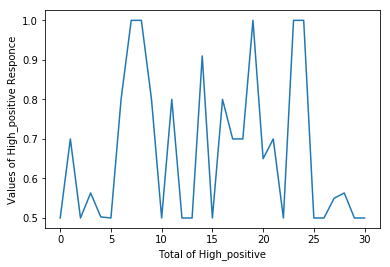

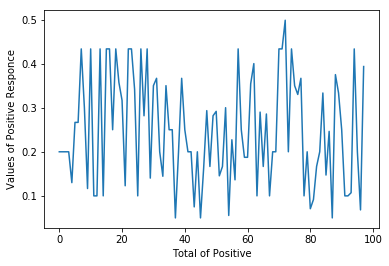

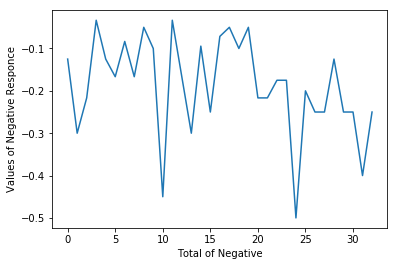

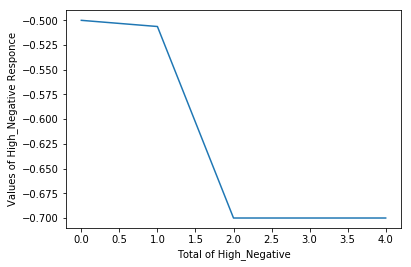

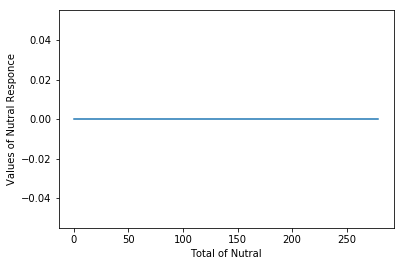

In [12]:
for key,values in result.items():
    plt.plot([i for i in range(len(values.keys()))],values.values())
    plt.xlabel("Total of {}".format(key))
    plt.ylabel('Values of {} Responce'.format(key))
    plt.show()

[31, 98, 33, 5, 280]


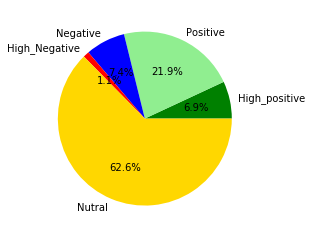

In [13]:
pie_chart={}
for key,values in result.items():
    temp=[]
    for v in values.values():
        temp.append(v)
    pie_chart[key]=temp
print([len(v) for v in pie_chart.values()])
color=['green','lightgreen','blue','red','gold']
plt.pie([len(v) for v in pie_chart.values()],labels=[key for key in pie_chart.keys()],colors=color,autopct='%1.1f%%')
plt.show()

In [14]:
X=[]
y=[]
for key,values in dic.items():
     for i in values:
        X.append(i[0])
        if i[1] >= 0.0:
             y.append(1)
        else:
            y.append(0)
y=np.array(y)

In [15]:
vectorizer=CountVectorizer(max_features=50,min_df=3,max_df=0.6,stop_words=stopwords.words("english"))
BOW=vectorizer.fit_transform(X).toarray()
BOW.shape

(800, 50)

In [16]:
Tfid=TfidfTransformer()
X_=Tfid.fit_transform(BOW).toarray()

In [17]:
kf =KFold(n_splits=5, random_state=None) 
for train_index, test_index in kf.split(X_):
      x_train, x_test = X_[train_index], X_[test_index] 
      y_train, y_test = y[train_index], y[test_index]

In [18]:
print("x_train: {}\nx_test: {}".format(x_train.shape, x_test.shape))
print("y_train: {}\ny_test: {}".format(y_train.shape,y_test.shape))

x_train: (640, 50)
x_test: (160, 50)
y_train: (640,)
y_test: (160,)


In [19]:
#x_train,x_test,y_train,y_test=train_test_split(X_,y_kmeans,test_size=0.3,random_state=1,stratify=y)
#v=np.array(y_train)

In [20]:
start=time.time()
model=SVC(kernel='linear').fit(x_train,y_train)
end=time.time()
scr=model.score(x_test,y_test)*100
print("Accuracy: {}\nTime_take Train_model: {}".format(scr,end-start))

Accuracy: 96.875
Time_take Train_model: 0.13766264915466309


In [21]:
start=time.time()
pre=model.predict(x_test)
end=time.time()
print("Time_take test_model: {}".format(end-start))
expected=y_test

Time_take test_model: 0.008246421813964844


In [22]:
cr=classification_report(y_test,pre)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.97      1.00      0.98       155

   micro avg       0.97      0.97      0.97       160
   macro avg       0.48      0.50      0.49       160
weighted avg       0.94      0.97      0.95       160



C:\Users\touQer_abaS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


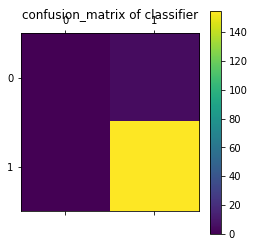

In [23]:
cm=confusion_matrix(y_test,pre)
plt.matshow(cm)
plt.colorbar()
plt.title("confusion_matrix of classifier")
plt.show()

In [24]:
print("RMS: {}".format(np.sqrt(np.mean(pre-expected))))

RMS: 0.1767766952966369


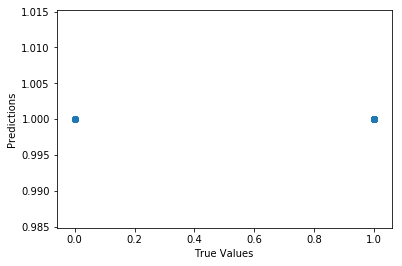

In [25]:
plt.scatter(y_test,pre)
plt.xlabel("True Values")
plt.ylabel('Predictions')
plt.show()

# Vader Sentiment

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [27]:
def print_sentiment_scores(text):
    vadersenti = analyser.polarity_scores(text)
    return {'pos':vadersenti['pos'],'neg':vadersenti['neg'],'neu':vadersenti['neu'],'compound': vadersenti['compound']}

In [28]:
vadar_dict={}
for key,values in dic.items():
    list=[]
    for i in values:
        list.append(i[0])
        result=print_sentiment_scores(i[0])
        list.append(result)
    vadar_dict[key]=list

In [29]:
matrix=[]

for k,v in vadar_dict.items():
    n=1
    for i in range(int(len(v)/2)):
        list1=[val for val in v[n].values()]
        idex=np.argmax(list1)
        matrix.append(idex)
        n+=2



In [30]:

pos=[]
neg=[]
neu=[]
compound=[]
for k,v in vadar_dict.items():
    n=1
    for i in range(int(len(v)/2)):
        list1=[val for val in v[n].values()]
        list2=[val for val in v[n].keys()]
        idx=np.argmax(list1)
        if list2[idx] == "pos":
            pos.append(list1[idx])
        elif list2[idx] == "neg":
            neg.append(list1[idx])
        elif list2[idx] == "neu":
            neu.append(list1[idx])
        else:
            compound.append(list1[idx])
        n+=2
comp={'pos':np.array(pos),'neg':np.array(neg),'neu':np.array(neu),'compound':np.array(compound)}

In [31]:
vader_y=np.array(matrix)

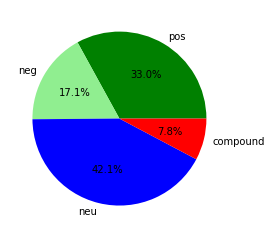

In [32]:
vader_y.view()

color=['green','lightgreen','blue','red']
plt.pie([matrix.count(0),matrix.count(1),matrix.count(2),matrix.count(3)],labels=['pos','neg','neu','compound'],colors=color,autopct='%1.1f%%')
plt.show()

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X_,vader_y,test_size=0.3,random_state=1)

In [34]:
start=time.time()
model=BernoulliNB().fit(x_train,y_train)
end=time.time()
scr=model.score(x_test,y_test)*100
print("Accuracy: {}\nTime_take Train_model: {}".format(scr,end-start))

Accuracy: 71.66666666666667
Time_take Train_model: 0.21854448318481445


In [35]:
start=time.time()
pre=model.predict(x_test)
end=time.time()
print("Time_take test_model: {}".format(end-start))
expected=y_test

Time_take test_model: 0.002132415771484375


In [36]:
cr=classification_report(y_test,pre)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        82
           1       0.57      0.98      0.72        41
           2       0.75      0.52      0.61        96
           3       0.50      0.24      0.32        21

   micro avg       0.72      0.72      0.72       240
   macro avg       0.66      0.67      0.63       240
weighted avg       0.72      0.72      0.70       240



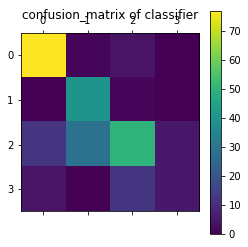

In [37]:
cm=confusion_matrix(y_test,pre)
plt.matshow(cm)
plt.colorbar()
plt.title("confusion_matrix of classifier")
plt.show()

## WordCloud for most occuring words

In [38]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100,colormap="Paired", background_color='black',)

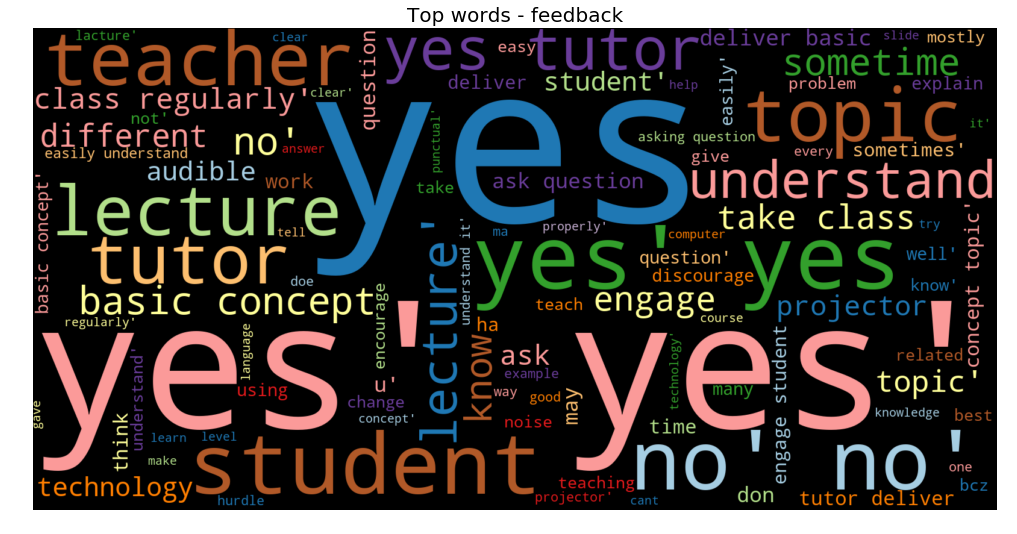

In [39]:
text=[]
for key,v in dic.items():
    for n in v:
        text.append(n[0])
wordcloud.generate(str(text))
plt.figure(figsize=(20,10))
plt.title("Top words - feedback", fontsize=20,color='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

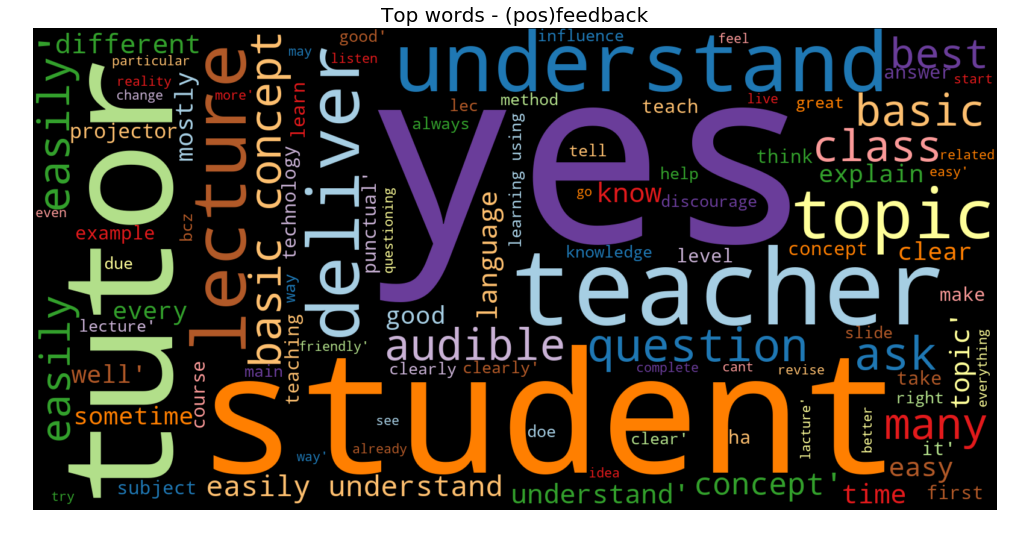

In [40]:
text=[]
for key,v in dic.items():
    for n in v:
        if n[1]>0:
            text.append(n[0])
wordcloud.generate(str(text))
plt.figure(figsize=(20,10))
plt.title("Top words - (pos)feedback", fontsize=20,color='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

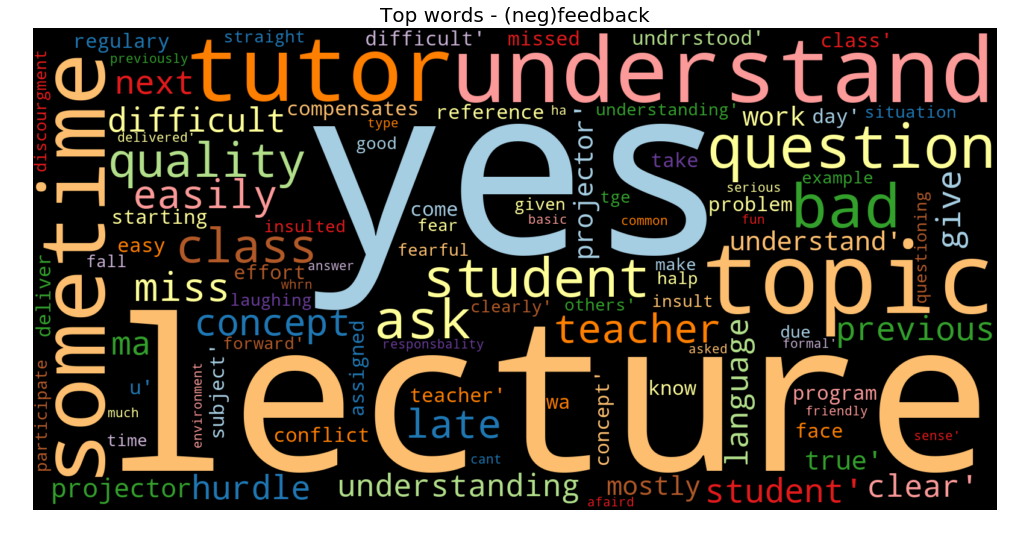

In [41]:
text=[]
for key,v in dic.items():
    for n in v:
        if n[1]<0:
            text.append(n[0])
wordcloud.generate(str(text))
plt.figure(figsize=(20,10))
plt.title("Top words - (neg)feedback", fontsize=20,color='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

# Manual

In [42]:
expert=pd.read_csv("C:\\Users\\touQer_abaS\\Downloads\\Untitled form (1).csv")

In [43]:
expert=expert.drop(columns=["Timestamp"])
expert=expert.drop(columns=["Any Suggestions regarding data collection?"])

In [44]:
column=['MajorityRule','MajorityRule.1','MajorityRule.2','MajorityRule.3','MajorityRule.4','MajorityRule.5','MajorityRule.6','MajorityRule.7','MajorityRule.8','MajorityRule.9']

In [45]:

p=[]
for i in column:
    for j in expert[i].replace(['negative','neutral','positive'],[-1,0,1]):
        p.append(j)

In [46]:
y_lable=np.array(p)
y_lable[70:95]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  0, -1, -1])

In [47]:
y_lable.shape

(800,)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X_,y_lable,test_size=0.3,random_state=1)

In [49]:
start=time.time()
model=BernoulliNB().fit(x_train,y_train)
end=time.time()
scr=model.score(x_test,y_test)*100
print("Accuracy: {}\nTime_take Train_model: {}".format(scr,end-start))

Accuracy: 78.75
Time_take Train_model: 0.005356550216674805


In [50]:
list1=[]
list2=[]
compare=[]
for k,v in vadar_dict.items():
    n=1
    for i in range(int(len(v)/2)):
        list1=[val for val in v[n].values()]
        list2=[val for val in v[n].keys()]
        idx=np.argmax(list1)
        if list2[idx] == "pos":
            compare.append('positive')
        elif list2[idx] == "neg":
            compare.append('negative')
        elif list2[idx] == "neu":
            compare.append('neutral')
        else:
            if list1[idx] >= 0.5:
                compare.append('positive')
            elif list1[idx] >= -0.5 and list2[idx] <0.5:
                compare.append('neutral')
            else:
                compare.append('negative')
        n+=2

In [51]:
list1=[]
for i in column:
    for j in expert[i]:
        list1.append(j)

In [52]:
list2=[]
for j,k in zip(list1,compare):
    list2.append(j==k)



In [53]:
list2.count(True)/800

0.635

In [54]:
list2.count(False)

292